In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing data and basic analysis

In [114]:
data = pd.read_csv('/content/drive/MyDrive/datas/dataset_rap.csv', sep=',')

In [115]:
data.head(10)

,Unnamed: 0,artist,title,year,lyrics_x
0,0,100 Blaze,ASKIP,2022.0,"\n\nOh\n\nIls vont t'coller par interêt, crois..."
1,1,100 Blaze,Balec,2019.0,J'me suis marié au rap sans dire merci\nLà j's...
2,2,100 Blaze,Black Gogeta,2018.0,\nBlack Gogeta\nBlack Gogeta\nBlack Gogeta\nBl...
3,3,100 Blaze,Black Or White,2022.0,"\n\nNoir ou blanc, on évite d'aller trop finir..."
4,4,100 Blaze,Blazedog,2022.0,\n\nJ'ai grandi dans les blocs tout pourris de...
5,5,100 Blaze,Blow,2022.0,"\n\nHello, people, j'suis dans l'arène, ça fai..."
6,6,100 Blaze,Boosk’Castellane,2018.0,"\nIls m'disaient : ""Baisse la tête et marche t..."
7,7,100 Blaze,Brolik,2018.0,"\nYah, yah, yah, yah\nYah, yah, yah, yah\nYah,..."
8,8,100 Blaze,Ce qu’il se passe dehors,2019.0,\nJ'fais ça tous les jours\nEt puis normalemen...
9,9,100 Blaze,Coco,2022.0,\n\nNo-no-no-no-no-no-no\nNo-no-no-no-no\nNo-n...


In [116]:
for col in data.columns:
    print(col,': ',data[col].isnull().sum())

Unnamed: 0 :  0
artist :  0
title :  0
year :  4723
lyrics_x :  0


In [117]:
data.loc[:,"year"]=data.loc[:,"year"].fillna("9999")

In [118]:
data = data.drop(columns= "Unnamed: 0")
data['year'] = data['year'].astype(int)

In [119]:
data.head(10)

,artist,title,year,lyrics_x
0,100 Blaze,ASKIP,2022,"\n\nOh\n\nIls vont t'coller par interêt, crois..."
1,100 Blaze,Balec,2019,J'me suis marié au rap sans dire merci\nLà j's...
2,100 Blaze,Black Gogeta,2018,\nBlack Gogeta\nBlack Gogeta\nBlack Gogeta\nBl...
3,100 Blaze,Black Or White,2022,"\n\nNoir ou blanc, on évite d'aller trop finir..."
4,100 Blaze,Blazedog,2022,\n\nJ'ai grandi dans les blocs tout pourris de...
5,100 Blaze,Blow,2022,"\n\nHello, people, j'suis dans l'arène, ça fai..."
6,100 Blaze,Boosk’Castellane,2018,"\nIls m'disaient : ""Baisse la tête et marche t..."
7,100 Blaze,Brolik,2018,"\nYah, yah, yah, yah\nYah, yah, yah, yah\nYah,..."
8,100 Blaze,Ce qu’il se passe dehors,2019,\nJ'fais ça tous les jours\nEt puis normalemen...
9,100 Blaze,Coco,2022,\n\nNo-no-no-no-no-no-no\nNo-no-no-no-no\nNo-n...


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50855 entries, 0 to 50854
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   artist    50855 non-null  object
 1   title     50855 non-null  object
 2   year      50855 non-null  int64 
 3   lyrics_x  50855 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.6+ MB


In [121]:
len(data["artist"].unique())

724

In [122]:
data.shape

(50855, 4)

In [123]:
data.describe()

,year
count,50855.000000
mean,2756.576580
std,2317.381634
min,1969.000000
25%,2013.000000
50%,2018.000000
75%,2021.000000
max,9999.000000


## "tokenizer" function to isolate words

In [124]:
def tokenizer(texte):
  spl = texte.lower().split(" ")
  i=0
  res = []
  for e in spl:
    for j in [',','-',':','!','?','.','...','’','(',')', '\n']:
      e = e.replace(j, "")
      spl[i] = e
    i = i+1
  for m in spl:
    if m != '':
      res.append(m)
  return res

## Graphs around the number of words used by each artists

In [125]:
data["nb_mots"] = data["lyrics_x"].apply(tokenizer).apply(len)
rap_lyrics_gb = data.groupby(["artist"])[["nb_mots"]].mean()
rap_lyrics_gb

,nb_mots
artist,
100 Blaze,434.313725
10vers,447.555556
113,460.623529
13 Block,454.250000
1995,575.487805
...,...
Zola,346.098039
Zoxea,355.773333
Zuukou Mayzie,270.186667


In [126]:
rap_lyrics_gb.loc[:, 'nb_mots'].mean()

395.46205716888096

In [127]:
plot = rap_lyrics_gb.reset_index().sort_values("nb_mots")
plot_top_20 = plot.iloc[-20:]
plot_bottom_20 = plot.iloc[:20]

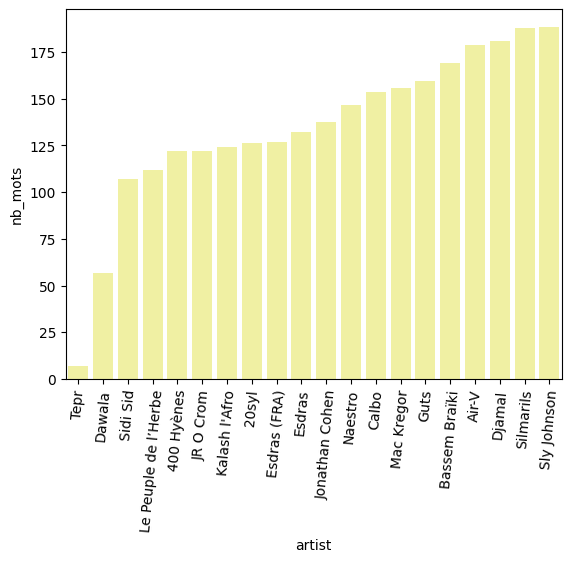

In [128]:
plt.figure()

sns.barplot(data=plot_bottom_20, x="artist", y="nb_mots", color = "#fdfd96")

plt.xticks(rotation=85)

plt.show()

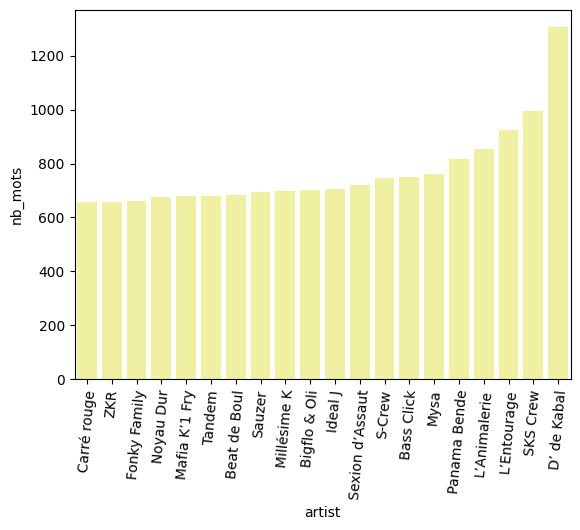

In [129]:
plt.figure()

sns.barplot(data=plot_top_20, x="artist", y="nb_mots", color = "#fdfd96")

plt.xticks(rotation=85)

plt.show()

## Graphs of number of differents words and different/total ratio for each artist

In [130]:
rap = data[["artist", "lyrics_x"]]
rap_concat = rap.groupby(['artist'])['lyrics_x'].apply(' '.join).reset_index()


rap_concat["nb_mots_tot"] = rap_concat["lyrics_x"].apply(tokenizer).apply(len)
rap_concat["nb_mots_diff"] = rap_concat["lyrics_x"].apply(tokenizer).apply(set).apply(list).apply(len)

rap_concat = rap_concat.sort_values("nb_mots_diff")

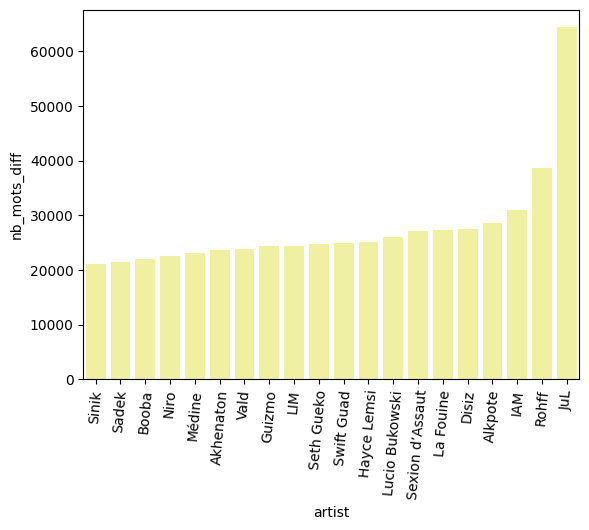

In [131]:
plt.figure()

sns.barplot(data=rap_concat[-20:], x="artist", y="nb_mots_diff", color = "#fdfd96")

plt.xticks(rotation=85)

plt.show()

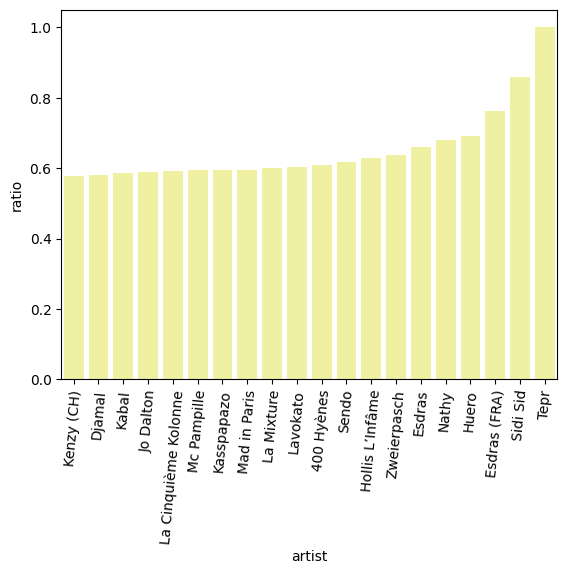

In [132]:
rap_concat["ratio"] = rap_concat["nb_mots_diff"]/rap_concat["nb_mots_tot"]
rap_concat = rap_concat.sort_values("ratio")

plt.figure()

sns.barplot(data=rap_concat[-20:], x="artist", y="ratio", color = "#fdfd96")
plt.xticks(rotation=85)

plt.show()

## Most frequent words for a particular artist

In [133]:
from collections import Counter
booba = data[["artist", "lyrics_x"]]
booba = booba.groupby(['artist'])['lyrics_x'].apply(' '.join).reset_index()

booba = booba[booba["artist"] == "Booba"]

lyrics_booba = booba["lyrics_x"].apply(tokenizer)

lyrics_booba = list(lyrics_booba)
lyrics_booba = lyrics_booba[0]

Counter(lyrics_booba).most_common(20)

[('la', 3134),
 ('de', 2950),
 ('le', 2300),
 ('pas', 2087),
 ('les', 1967),
 ('à', 1760),
 ('dans', 1513),
 ('je', 1428),
 ('en', 1179),
 ('que', 1074),
 ('un', 1050),
 ('des', 1015),
 ('tu', 998),
 ("c'est", 979),
 ('du', 950),
 ('et', 948),
 ('mon', 883),
 ('pour', 859),
 ('sur', 847),
 ('comme', 830)]

In [134]:
premiers_mots = list(Counter(lyrics_booba).most_common(20))

premiers_mots = [i[0] for i in premiers_mots]

premiers_mots

['la',
 'de',
 'le',
 'pas',
 'les',
 'à',
 'dans',
 'je',
 'en',
 'que',
 'un',
 'des',
 'tu',
 "c'est",
 'du',
 'et',
 'mon',
 'pour',
 'sur',
 'comme']

In [135]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [136]:
from nltk.corpus import *
sw = stopwords.words('french')
sw2 = [w for w in open("/content/drive/MyDrive/datas/stopword.txt",encoding='utf-8').read().split(",")]
sw = sw+sw2
sw = sw

for i in range(len(lyrics_booba)):
  if lyrics_booba[i] in sw:
    lyrics_booba[i] = ""
  if len(lyrics_booba[i]) <4:
    lyrics_booba[i] = ""
  if lyrics_booba[i] in premiers_mots:
    lyrics_booba[i] = ""

l_booba = []

for e in lyrics_booba:
  if e != '':
    l_booba.append(e)

In [137]:
Counter(l_booba).most_common(20)

[('rien', 286),
 ('veux', 259),
 ('trop', 258),
 ('jamais', 222),
 ('toujours', 201),
 ('négro', 198),
 ('bien', 189),
 ('gros', 167),
 ('ouais', 140),
 ('mère', 135),
 ('deux', 127),
 ('fuck', 120),
 ('millions', 118),
 ('monde', 116),
 ('cœur', 103),
 ('noir', 101),
 ('temps', 100),
 ('sais', 99),
 ('cash', 93),
 ('négros', 92)]

## WordCloud for 3 artists

In [138]:
from wordcloud import WordCloud

def cloud(str_artist):
  artist = data[["artist", "lyrics_x"]]
  artist = artist.groupby(['artist'])['lyrics_x'].apply(' '.join).reset_index()
  artist = artist[artist["artist"] == str_artist]
  lyrics_artist = artist["lyrics_x"].apply(tokenizer)
  lyrics_artist = list(lyrics_artist)
  lyrics_artist = lyrics_artist[0]
  Counter(lyrics_artist).most_common(20)
  premiers_mots = list(Counter(lyrics_artist).most_common(20))
  premiers_mots = [i[0] for i in premiers_mots]
  premiers_mots
  for i in range(len(lyrics_artist)):
    if lyrics_artist[i] in sw:
      lyrics_artist[i] = ""
    if len(lyrics_artist[i]) <4:
      lyrics_artist[i] = ""
    if lyrics_artist[i] in premiers_mots:
      lyrics_artist[i] = ""
  l_artist = []
  for e in lyrics_artist:
    if e != '':
      l_artist.append(e)
  plt.figure()
  wordcloud = WordCloud(background_color="white").generate(' '.join(l_artist))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

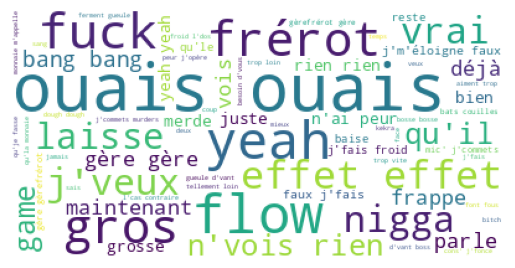

In [139]:
cloud("Kekra")

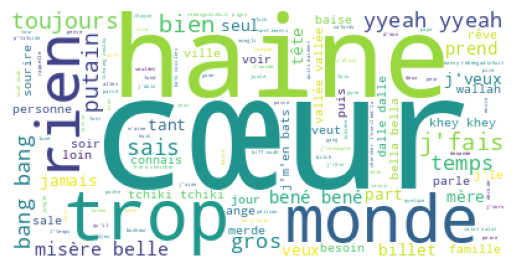

In [140]:
cloud("PNL")

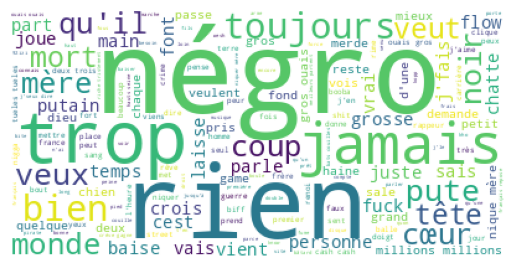

In [141]:
cloud("Booba")

## Text classification : creation of a predictive model between a rap and a pop song

In [142]:
df_fr = pd.DataFrame()
with open('/content/drive/MyDrive/datas/song_lyrics.csv') as fl:
    chunk_iter = pd.read_csv(fl, sep=",", chunksize = 100000)
    for chunk in chunk_iter:
        chunk = chunk.loc[chunk['language'] == "fr"]
        df_fr = pd.concat([df_fr,chunk])

In [143]:
print(df_fr["tag"].unique())

['rap' 'misc' 'pop' 'rb' 'rock' 'country']


In [144]:
df_pop_fr = df_fr.loc[df_fr['tag'] == "pop"]

df_pop_fr

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language
30362,Discold,pop,Zazie,2015,311,{},T'es venu me chercher\nC'est parfait\nOn a fin...,32094,fr,fr,fr
30507,Mes silences,pop,Chimne Badi,2014,692,"{""Chimène Badi""}",[Couplet 1]\nTu sauras lire dans mes silences\...,32247,fr,fr,fr
51860,Face à la mer,pop,Calogero,2004,13750,{Passi},Intéressé(e) par l'explication des paroles de ...,54984,fr,fr,fr
53205,Soleil,pop,Grgoire,2011,2650,{Grégoire},[Verse 1]\nOn n'a pas le même drapeau\nNi la m...,56508,fr,fr,fr
61745,Qui Est Cette Fille?,pop,Yelle,2009,2870,{},(je m'appelle Yelle; elle s'appelle Robyn)\n\n...,66240,fr,fr,fr
...,...,...,...,...,...,...,...,...,...,...,...
5134463,Si tu veux tu es neuve fragment,pop,Lo Ferr,2000,2,"{""Léo Ferré""}",Si tu veux tu es neuve Si tu veux tu es la seu...,7882005,fr,fr,fr
5134467,« Une nuit que jétais près dune affreuse Juive »,pop,Lo Ferr,2008,1,"{""Léo Ferré""}",Une nuit que j’étais près d’une affreuse Juive...,7882010,fr,fr,fr
5134633,Labrinth Zendaya - All for us Traduction fran...,pop,Genius Traductions Franaises,2022,1,"{""Genius Traductions Françaises""}",[Intro: Labrinth]\nOh\nJe prends tout ça sur m...,7882310,fr,fr,fr
5134744,Edgar,pop,Fo (FRA),2018,5,"{""Foé (FRA)""}","[Couplet 1]\nT'as le foie, Edgar\nAvec des gor...",7882551,fr,fr,fr


In [145]:
for col in df_pop_fr.columns:
    print(col,': ',df_pop_fr[col].isnull().sum())

title :  1
tag :  0
artist :  0
year :  0
views :  0
features :  0
lyrics :  0
id :  0
language_cld3 :  0
language_ft :  0
language :  0


In [146]:
df_pop_fr.loc[:,"title"]=df_pop_fr.loc[:,"title"].fillna("titre_inconnu")

In [147]:
df_pop_fr = df_pop_fr[["title", "artist", "lyrics", "tag"]]
df_pop_fr

,title,artist,lyrics,tag
30362,Discold,Zazie,T'es venu me chercher\nC'est parfait\nOn a fin...,pop
30507,Mes silences,Chimne Badi,[Couplet 1]\nTu sauras lire dans mes silences\...,pop
51860,Face à la mer,Calogero,Intéressé(e) par l'explication des paroles de ...,pop
53205,Soleil,Grgoire,[Verse 1]\nOn n'a pas le même drapeau\nNi la m...,pop
61745,Qui Est Cette Fille?,Yelle,(je m'appelle Yelle; elle s'appelle Robyn)\n\n...,pop
...,...,...,...,...
5134463,Si tu veux tu es neuve fragment,Lo Ferr,Si tu veux tu es neuve Si tu veux tu es la seu...,pop
5134467,« Une nuit que jétais près dune affreuse Juive »,Lo Ferr,Une nuit que j’étais près d’une affreuse Juive...,pop
5134633,Labrinth Zendaya - All for us Traduction fran...,Genius Traductions Franaises,[Intro: Labrinth]\nOh\nJe prends tout ça sur m...,pop
5134744,Edgar,Fo (FRA),"[Couplet 1]\nT'as le foie, Edgar\nAvec des gor...",pop


In [148]:
data = data.rename(columns={'lyrics_x': 'lyrics'})[["title", "artist", "lyrics"]]
data["tag"] = "rap"

data

,title,artist,lyrics,tag
0,ASKIP,100 Blaze,"\n\nOh\n\nIls vont t'coller par interêt, crois...",rap
1,Balec,100 Blaze,J'me suis marié au rap sans dire merci\nLà j's...,rap
2,Black Gogeta,100 Blaze,\nBlack Gogeta\nBlack Gogeta\nBlack Gogeta\nBl...,rap
3,Black Or White,100 Blaze,"\n\nNoir ou blanc, on évite d'aller trop finir...",rap
4,Blazedog,100 Blaze,\n\nJ'ai grandi dans les blocs tout pourris de...,rap
...,...,...,...,...
50850,Thérapie de groupe,Ärsenik,"\nDu calme dans la salle\nMessieurs, du calme\...",rap
50851,Tous Veulent Le Succès,Ärsenik,"(x2)\nTous veulent le succès, le luxe, le bizz...",rap
50852,Un monde parfait,Ärsenik,\n\n- Est-ce que tu crois que Dieu existe ?\n-...,rap
50853,Une affaire de famille,Ärsenik,Une affaire de famille Lyrics[Lino]\nOn prend ...,rap


In [149]:
chansons = pd.concat([data, df_pop_fr])

In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


from nltk.corpus import stopwords
stopwords = stopwords.words('french')+[w for w in open("/content/drive/MyDrive/M2_Python/TP4/data/stopword.txt",encoding='utf-8').read().split(",")]

vec = TfidfVectorizer(stop_words=stopwords, ngram_range=(1,1))
X_features = vec.fit_transform(chansons.lyrics)

target = LabelEncoder().fit_transform(chansons.tag)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features,target, test_size = 0.3, random_state=555)

In [151]:
print(X_train.shape)

(77496, 265984)


In [152]:
vec.get_feature_names_out()

array(['00', '000', '000001', ..., '𝙫𝙞𝙡𝙠', '𝟮𝙚', '𝟯𝙚'], dtype=object)

### Hyperparameters

Not a lof of options in the grid, cv = 3 only, and only 2 models because the time of execution is really long

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost.sklearn import XGBClassifier

random_seed=555

# RF = {
# 'model' : RandomForestClassifier(),
# 'parameters' : {'n_estimators' : [20, 50,100],
#                 'max_depth' : [10,30,50,70,90],
#                 'random_state' : [random_seed]
#                 }
# }


XGB = {
'model' : XGBClassifier(),
'parameters' : {'n_estimators' : [20, 60, 100],
                 'learning_rate' : [1e-1, 1e-2, 1e-3],
                 'seed' : [random_seed]
                }
}

# SVM = {
# 'model' : SVC(),
# 'parameters' : {
#                 'kernel' : ['linear'],
#                 'C': [0.1, 1],
#                 'gamma' : [0.001,0.01, 0.1],
#                 'tol' : [ 1e-2, 1e-3],
#                 'random_state' : [random_seed]
#                 }
# }

XT = {
'model' : ExtraTreesClassifier(),
'parameters' : {'n_estimators' : [20, 100],
                'max_depth' : [30, 70],
                'random_state' : [random_seed]
                }
}

Models_list = [XT, XGB]

from sklearn.model_selection import GridSearchCV
scorer ='f1'
res={}
for model_class in Models_list:
    print(str(model_class['model']).split('(')[0])
    model_opt=GridSearchCV(estimator=model_class['model'],param_grid=model_class['parameters'], cv=3, scoring = scorer, return_train_score=True).fit(X_train, y_train)
    res.update({str(model_class['model']).split('(')[0] : model_opt.cv_results_})

ExtraTreesClassifier
XGBClassifier


In [154]:
import pandas as pd

df_res=pd.DataFrame({'algo':[],'mean_train_score': [],'std_train_score': [],'mean_test_score': [], 'std_test_score':[],'params':[]})
for algo in list(res):
    model_opt=res[algo]
    df=pd.DataFrame({'algo':algo,'mean_train_score':model_opt['mean_train_score'],'std_train_score':model_opt['std_train_score'], 'mean_test_score':model_opt['mean_test_score'],'std_test_score':model_opt['std_test_score'],'params':model_opt['params']}, )
    df_res = pd.concat([df_res, df],ignore_index=True)

df_res.sort_values(['mean_test_score','std_test_score','mean_train_score','std_train_score'], ascending=[False,True,False,True])

,algo,mean_train_score,std_train_score,mean_test_score,std_test_score,params
6,XGBClassifier,0.916651,0.000954,0.900903,0.000965,"{'learning_rate': 0.1, 'n_estimators': 100, 's..."
5,XGBClassifier,0.899531,0.001318,0.888004,0.001224,"{'learning_rate': 0.1, 'n_estimators': 60, 'se..."
4,XGBClassifier,0.854920,0.002474,0.846755,0.003798,"{'learning_rate': 0.1, 'n_estimators': 20, 'se..."
3,ExtraTreesClassifier,0.876068,0.002612,0.815611,0.001166,"{'max_depth': 70, 'n_estimators': 100, 'random..."
9,XGBClassifier,0.818936,0.001743,0.813922,0.003959,"{'learning_rate': 0.01, 'n_estimators': 100, '..."
8,XGBClassifier,0.798970,0.002259,0.795047,0.002631,"{'learning_rate': 0.01, 'n_estimators': 60, 's..."
2,ExtraTreesClassifier,0.859455,0.004193,0.787190,0.005755,"{'max_depth': 70, 'n_estimators': 20, 'random_..."
7,XGBClassifier,0.740504,0.006079,0.736471,0.006010,"{'learning_rate': 0.01, 'n_estimators': 20, 's..."
1,ExtraTreesClassifier,0.700666,0.003600,0.655567,0.003069,"{'max_depth': 30, 'n_estimators': 100, 'random..."
0,ExtraTreesClassifier,0.683556,0.005266,0.637045,0.007383,"{'max_depth': 30, 'n_estimators': 20, 'random_..."


XGBClassifier {'learning_rate': 0.1, 'n_estimators': 100, 'seed': 555}


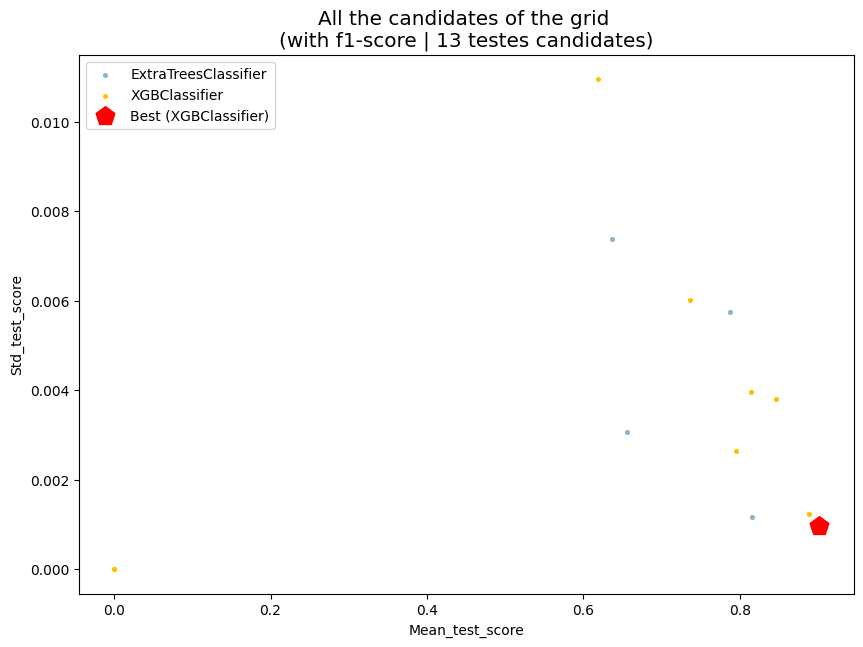

In [155]:
#Determine the best model (minimise variance and maximise f1 score on test samples)
index_best=df_res.sort_values(['mean_test_score','std_test_score','mean_train_score','std_train_score'], ascending=[False,True,False,True]).index[0]
fig = plt.figure(figsize=(10,7))
color_list = ["#8CB4CA", "#FFC000",  "#FF8B94"]
for cand_algo,col in zip(df_res['algo'].unique().tolist(),color_list):
    plt.scatter(df_res[df_res["algo"]==cand_algo]['mean_test_score'],df_res[df_res["algo"]==cand_algo]['std_test_score'], color=col, s=7, label=cand_algo)

#Best candidate with idnex index_best
plt.scatter(df_res.loc[index_best,'mean_test_score'],df_res.loc[index_best,'std_test_score'], color='red',marker='p', s=200, label="Best ("+str(df_res.loc[index_best]["algo"])+')')

#Legend + axis x/y
plt.xlabel('Mean_test_score')
plt.ylabel('Std_test_score')
plt.title('All the candidates of the grid \n(with '+scorer+'-score | '+str(df_res.shape[0])+' testes candidates)', size = 'x-large')
plt.legend(loc=2)

print(df_res.loc[index_best,'algo'],df_res.loc[index_best,'params'])

In [156]:
# best model

model_XGB = XGBClassifier(learning_rate=0.1,n_estimators=100, seed=555)
model_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [157]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model_XGB.predict(X_test))

array([[17221,   744],
       [ 2029, 13219]])

In [158]:
from sklearn.metrics import roc_auc_score, brier_score_loss, average_precision_score, f1_score, accuracy_score, matthews_corrcoef, precision_score, recall_score, fbeta_score, cohen_kappa_score
def calcul_metrique_fct(list_models,list_metrics,y_test=y_test,y_train=y_train,X_test=X_test,X_train=X_train):
    for model in list_models:
        print(str(model).split('(')[0])
        for metric in list_metrics:
            name_metric=str(metric).split(' ')[1]
            if name_metric in ['roc_auc_score','brier_score_loss']:
                perf_train=metric(y_train,[pr[1] for pr in model.predict_proba(X_train)])
                perf_test=metric(y_test,[pr[1] for pr in model.predict_proba(X_test)])
                print("\t{0:s} Train : {1:f} \t Test {2:f}".format(name_metric,perf_train,perf_test))
            else:
                perf_train=metric(y_true=y_train,y_pred=model.predict(X_train))
                perf_test=metric(y_true=y_test,y_pred=model.predict(X_test))
                print("\t{0:s} Train : {1:f} \t Test {2:f}".format(name_metric,perf_train,perf_test))


calcul_metrique_fct([model_XGB], list_metrics=[f1_score,accuracy_score,brier_score_loss,roc_auc_score])

XGBClassifier
	f1_score Train : 0.913742 	 Test 0.905070
	accuracy_score Train : 0.924203 	 Test 0.916509
	brier_score_loss Train : 0.059759 	 Test 0.066214
	roc_auc_score Train : 0.976710 	 Test 0.969005
